# Introduccion



En este notebook se realiza un analisis exploratorio de los datos, con el fin de obtener una idea de como se comportan los datos y que tipo de analisis se pueden realizar.

El dataset **titanic.csv** contiene los detalles de un subconjunto de pasajeros a bordo (1309 pasajeros, para ser exactos, donde cada pasajero obtiene una fila diferente en la tabla).

# Carga Datos

## Importacion librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Creacion de Dataframe

In [2]:
data = pd.read_csv('../data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Explicacion Datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Columna      | Descripción                                  | Tipo de Datos | Valores No Nulos | Comentarios                                         |
|--------------|----------------------------------------------|---------------|------------------|-----------------------------------------------------|
| PassengerId  | Identificador único del pasajero             | int64         | 1309             |                                                     |
| Survived     | Sobrevivencia del pasajero                   | int64         | 1309             | 0 = No (No sobrevivió), 1 = Sí (Sobrevivió)         |
| Pclass       | Clase del boleto del pasajero                | object        | 1309             | 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase |
| Name         | Nombre del pasajero                         | object        | 1309             |                                                     |
| Sex          | Género del pasajero                         | object        | 1223             | "male" = Hombre, "female" = Mujer                   |
| Age          | Edad del pasajero                           | float64       | 1132             |                                                     |
| SibSp        | Número de hermanos/cónyuges a bordo          | int64         | 1309             |                                                     |
| Parch        | Número de padres/hijos a bordo               | object        | 1309             |                                                     |
| Ticket       | Número del boleto                            | object        | 1308             |                                                     |
| Fare         | Tarifa pagada por el pasajero                | object        | 982              |                                                     |
| Cabin        | Número de cabina                            | object        | 622              |                                                     |
| Embarked     | Puerto de embarque del pasajero              | object        | 889              | "C" = Cherbourg, "Q" = Queenstown, "S" = Southampton |


- **Existen valores nulos**
- **Algunas columnas no tienen el tipo de dato correcto como por ejemplo Pclass,Parch,Fare**

# Exploracion inicial

In [4]:
# Primeras filas del conjunto de datos
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Resumen estadistico

In [5]:
#Resumen estadistico columnas numericas
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Columnas tipo objeto
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Consultas basicas antes de limpieza

### Porcentaje de sobrevivientes

In [7]:
porcentaje_supervivencia = (data['Survived'].mean()) * 100
print(f'Porcentaje de Sobrevivientes: {porcentaje_supervivencia:.2f}%')

Porcentaje de Sobrevivientes: 38.38%


## Porcentaje de supervivientes por clase

In [8]:
p_sup_class = data.groupby('Pclass')['Survived'].mean() * 100

print('Porcentaje de supervivencia por clase')
print(p_sup_class)

Porcentaje de supervivencia por clase
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [9]:
#Verificando las clases que existen actualmente
data['Pclass'].value_counts() 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Porcentaje de supervivientes por sexo

In [10]:
p_sup_sex = data.groupby('Sex')['Survived'].mean() * 100
print('Porcentaje de supervivencia por sexo')
print(p_sup_sex)

Porcentaje de supervivencia por sexo
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


# Limpieza de datos

## Datos faltantes

### Identificar datos faltantes

In [11]:
# Cantidad de datos faltantes por columna
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Las columnas con datos faltantes son:**

- Age:177
- Cabin:687
- Embarked:2

### Manejo de datos faltantes

#### Edad

In [12]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


**Dado que es una variable numérica, se va a considerar llenar los valores faltantes con la media o mediana de esa columna.**

In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)

#### Cabina

In [14]:
data[data['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


**Al ser demasiados valores nulos y no poder determinar una forma adecuada para el tratamiento de esta columna, la opcion mas ideal seria eliminar la columna para evitar el sesgo de cabinas** 

In [15]:
data.drop('Cabin', axis=1, inplace=True)

#### Embarked

In [16]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [17]:
data['Embarked'].fillna('D', inplace=True)

**Se llenara con D o desconocido estos dos datos**

#### Ticket

In [18]:
data['Ticket'].isnull().sum()

0

**Si bien la columna ticket no tiene datos vacios, en nuestro analisis es irrelevante tenerla ya que el ticket no nos dice respecto a la supervivencia de las personas y general son ticket generados aleatoriamente**

In [19]:
data.drop('Ticket', axis=1, inplace=True)

## Verificar datos

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


**Ya no existen datos nulos, lo que sigue sera verificar si hay duplicados y cambiar tipo de datos de algunas columnas**


## Manejo de duplicados

In [22]:
#Mostrar si hay valores duplicados
data.duplicated().sum()

0

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.shape #Verificar el size de data

(891, 10)

**El dataframe quedo con el mismo numero de elementos, concluyendo que no existen datos duplicados**

# Visualizacion de datos

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

## Resumen Estadistico

In [26]:
summary_stats = data.describe(include='all')
print(summary_stats)


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch        Fare Embarked

## Matriz de correlacion

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


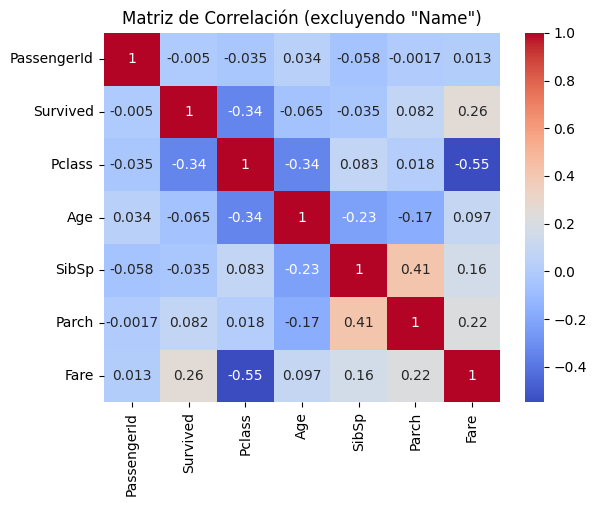

In [28]:
#Creacion de columnas excluidad y de la matriz
columns_to_exclude = ['Name','Sex','Embarked']
columns_for_correlation = [col for col in data.columns if col not in columns_to_exclude]

# Calcular la matriz de correlación
corr_matrix = data[columns_for_correlation].corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (excluyendo "Name")')
plt.show()


## Visualizacion variables numericas

### Distribucion de la edad

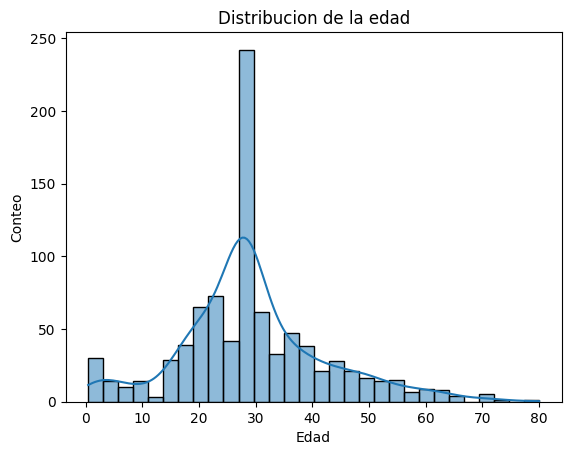

In [29]:
sns.histplot(data['Age'],kde=True)
plt.title('Distribucion de la edad')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()

**Se puede ver que la mayoria de pasajeros tiene un rango de 20-30 años**

### Distribucion de la clase

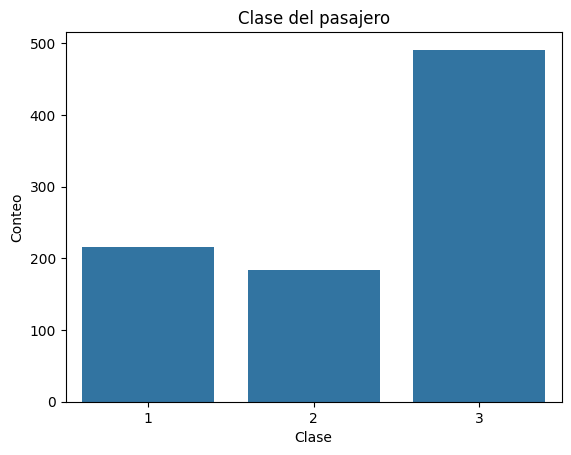

In [30]:
sns.countplot(x='Pclass',data=data)
plt.title('Clase del pasajero')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

**La mayoria de los pasajeros fueron de tercera clase**

### Distribucion del costo del boleto

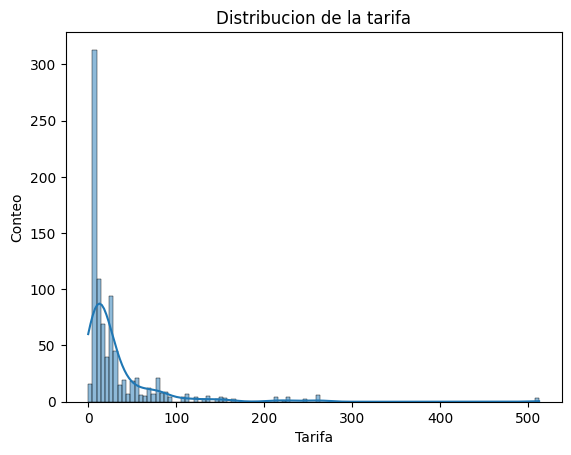

In [31]:
sns.histplot(data['Fare'],kde=True)
plt.title('Distribucion de la tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Conteo')
plt.show()

In [32]:
print(f'Promedio de la tarifa del boleto: {round(data["Fare"].mean(),2)}')

print(f'Desviacion estandar de la tarifa del boleto {round(data["Fare"].std(),2)}')

Promedio de la tarifa del boleto: 32.2
Desviacion estandar de la tarifa del boleto 49.69


**Podemos decir que la mayoria de boleto su tarifa es menor a $50 dolares**

La tarifa se ve afectada por la clase y podemos determinar que es correcto debido a que la mayor parte de las personas fueron de tercera clase

### Distribucion de Numero de hermanos o conyuge

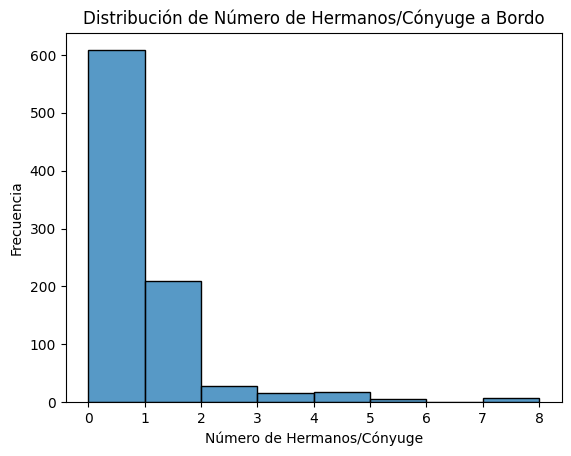

In [33]:
sns.histplot(data['SibSp'], bins=range(0, max(data['SibSp']) + 1), kde=False)
plt.title('Distribución de Número de Hermanos/Cónyuge a Bordo')
plt.xlabel('Número de Hermanos/Cónyuge')
plt.ylabel('Frecuencia')
plt.show()

**Se sugiere que la mayoría de los pasajeros no tenían hermanos ni cónyuge a bordo**

1. Pasajeros que viajan solos: Muchos pasajeros pueden haber viajado solos sin hermanos ni cónyuge a bordo, lo que se reflejaría en la frecuencia más alta en el valor 0.

2. Viajes con una pareja: Para aquellos que no viajaban solos, podrían haber estado acompañados solo por un hermano o cónyuge, lo que llevaría a la frecuencia en el valor 1.

### Distribucion de Número de padres/hijos a bordo 

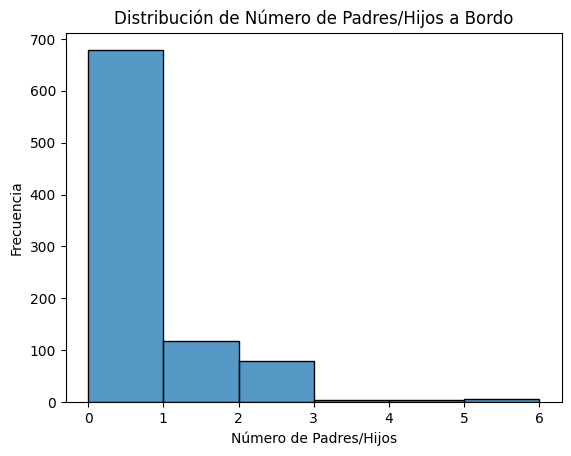

In [34]:
sns.histplot(data['Parch'], bins=range(0, max(data['Parch']) + 1), kde=False)
plt.title('Distribución de Número de Padres/Hijos a Bordo')
plt.xlabel('Número de Padres/Hijos')
plt.ylabel('Frecuencia')
plt.show()

1. Viajaban sin padres ni hijos: Una frecuencia alta en el valor 0 podría indicar que muchos pasajeros no tenían ni padres ni hijos a bordo y estaban viajando solos.

2. Viajaban con al menos un padre o hijo: La frecuencia en el valor 1 podría indicar que algunos pasajeros tenían al menos un padre o hijo a bordo.

## Visualizacion variables categoricas

### Distribucion de Genero

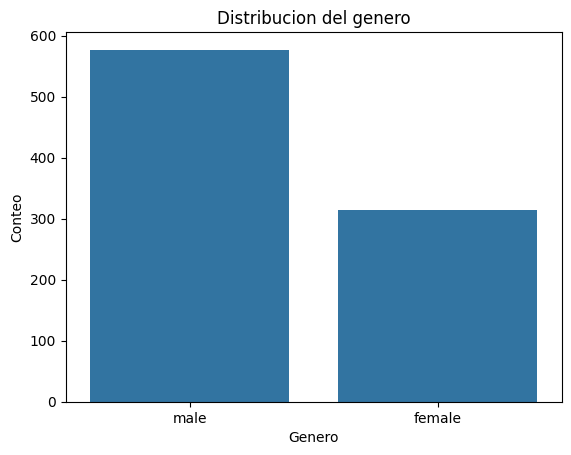

In [35]:
sns.countplot(x='Sex',data=data)
plt.title('Distribucion del genero')
plt.xlabel('Genero')
plt.ylabel('Conteo')
plt.show()


In [36]:
round(data['Sex'].value_counts(normalize=True) * 100,2)

Sex
male      64.76
female    35.24
Name: proportion, dtype: float64

**Mayoria de poblacion masculina**

### Distribucion del puerto de embarque

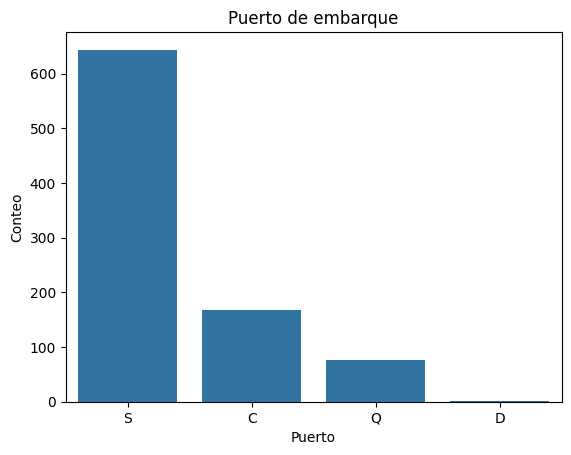

In [37]:
sns.countplot(x='Embarked',data=data)
plt.title('Puerto de embarque')
plt.xlabel('Puerto')
plt.ylabel('Conteo')
plt.show()

**La mayoria embargo en el puerto de Southampton**

Mas info https://es.wikipedia.org/wiki/Southampton

¿De que parte en Southampton zarpó el Titanic?

El White Star Dock, más tarde conocido como Ocean Dock, en Southampton, se inauguró en 1911. Fue desde este puerto, Berth 44, que el Titanic zarpó.

## Supervivencia

### Numero de supervivientes

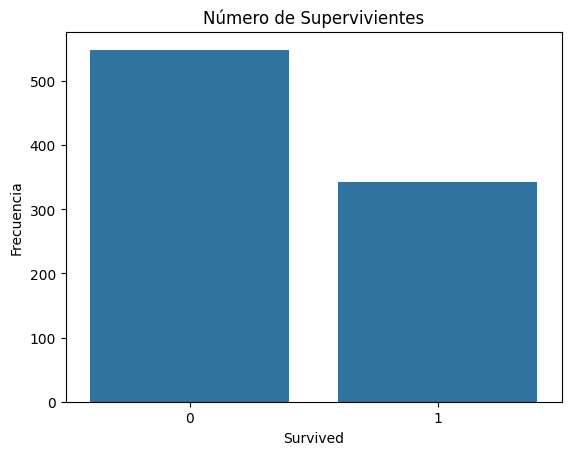

In [38]:
sns.countplot(x='Survived', data=data)
plt.title('Número de Supervivientes')
plt.xlabel('Survived')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
data['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

**En general el numero de defunciones fue mayor al de sobreviventes**

### Supervivencia vs Edad

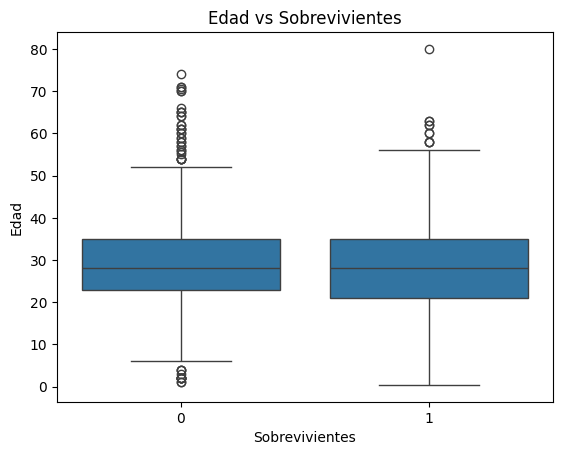

In [40]:
sns.boxplot(x='Survived',y='Age',data=data)
plt.title('Edad vs Sobrevivientes')
plt.xlabel('Sobrevivientes')
plt.ylabel('Edad')
plt.show()

1. *La mediana de la caja de los sobrevivientes está por encima de la mediana de la caja de los no sobrevivientes. Esto significa que, en promedio, los sobrevivientes son más jóvenes que los no sobrevivientes.*

2. *La caja de los sobrevivientes es más estrecha que la caja de los no sobrevivientes. Esto significa que los sobrevivientes tienen una edad más uniforme que los no sobrevivientes.*

**Podemos concluir que hay una relación positiva entre la edad y la probabilidad de supervivencia. Los sobrevivientes tienden a ser más jóvenes que los no sobrevivientes.**

### Supervivencia vs Clase

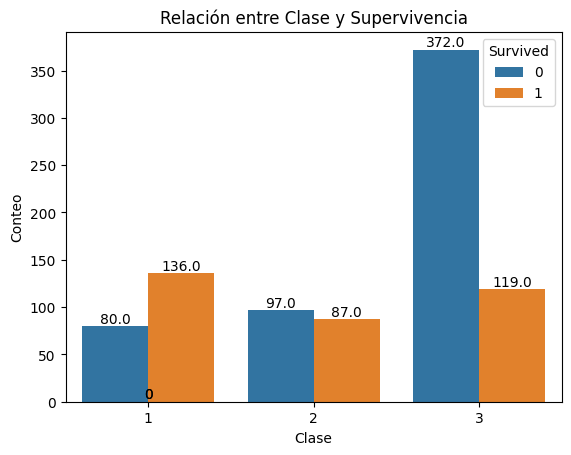

In [41]:
fig, ax = plt.subplots()
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax)

# Agrega el número de supervivientes
for i in range(len(ax.patches)):
    ax.annotate(str(ax.patches[i].get_height()), (ax.patches[i].get_x() + ax.patches[i].get_width() / 2, ax.patches[i].get_height()), ha='center', va='bottom')

# Agrega los títulos y etiquetas
ax.set_title('Relación entre Clase y Supervivencia')
ax.set_xlabel('Clase')
ax.set_ylabel('Conteo')

# Muestra el gráfico
plt.show()

**Podemos concluir que hay una relación positiva entre la clase y la probabilidad de supervivencia. Los pasajeros de la clase 1 tenían más probabilidades de sobrevivir que los pasajeros de las otras dos clases.**

Sin embargo hay que recordar que la mayoria de los pasajeros era de la tercera clase

### Supervivencia vs Sexo

In [42]:
pd.crosstab(data['Sex'], data['Survived'], margins=True, margins_name='Total')


Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


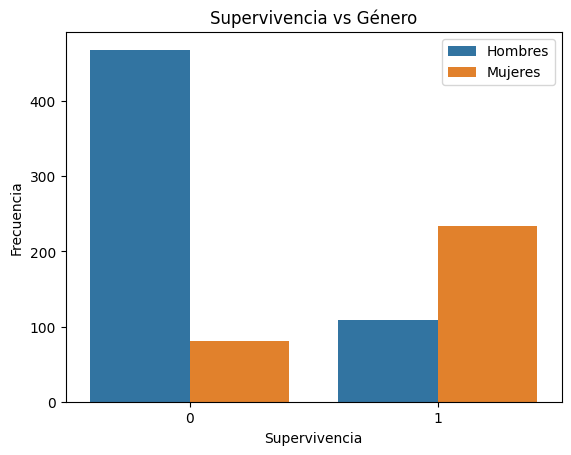

In [43]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.legend(labels=['Hombres', 'Mujeres'])
sns.set_palette('Oranges')


plt.title('Supervivencia vs Género')
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.show()

**En general fallecieron mas hombres que mujeres, si bien hubo mas hombres en el titanic el porcentaj de un supervivencia de hombre equivale al 20% aproximadamente de acuerdo a los datos**

### Supervivencia vs SibSp(Numero de hermanos/conyuge)

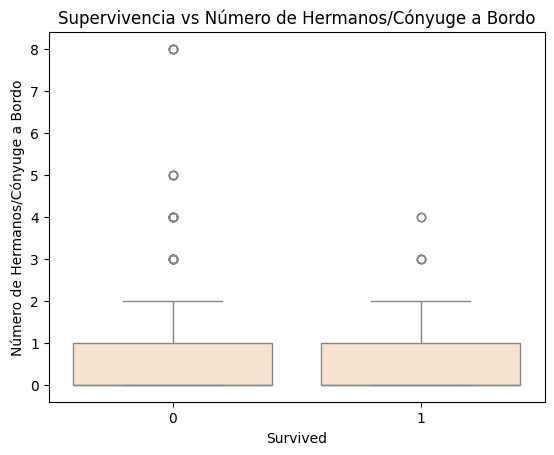

In [44]:
sns.boxplot(x='Survived', y='SibSp', data=data)
sns.set_palette('Blues')
plt.title('Supervivencia vs Número de Hermanos/Cónyuge a Bordo')
plt.xlabel('Survived')
plt.ylabel('Número de Hermanos/Cónyuge a Bordo')
plt.show()

**En general se muestra que los pasajeros con más hermanos/cónyuges a bordo tenían menos probabilidades de sobrevivir.**

Una teoria seria que los pasajeros con más hermanos/cónyuges a bordo tenían que priorizar la supervivencia de sus familiares, lo que les impedía acceder a los botes salvavidas.

### Supervivencia vs Parch(Numero de padres/hijos a bordo)

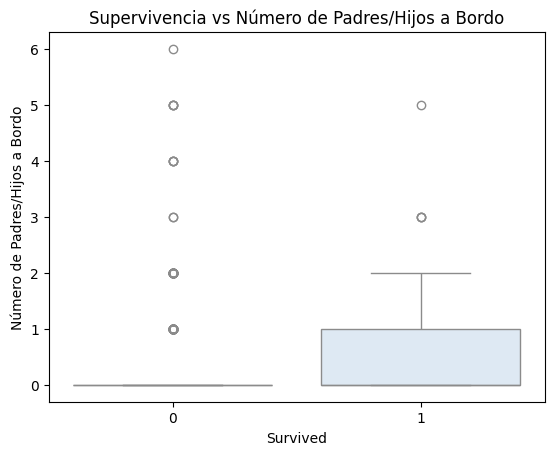

In [45]:
sns.boxplot(x='Survived', y='Parch', data=data)
plt.title('Supervivencia vs Número de Padres/Hijos a Bordo')
plt.xlabel('Survived')
plt.ylabel('Número de Padres/Hijos a Bordo')
plt.show()

**El gráfico sugiere que las personas con hijos tenían menos probabilidades de sobrevivir que las personas sin hijos en caso de un desastre marítimo. Esto se debe a que las personas con hijos tenían que priorizar la supervivencia de sus hijos, lo que les impedía acceder a los botes salvavidas.**

### Supervivencia vs Fare(Tarifa del boleto)

C:\Users\JorgeHdz\AppData\Local\Temp\ipykernel_15496\849286125.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Survived', y='Fare', data=data, ci=None)


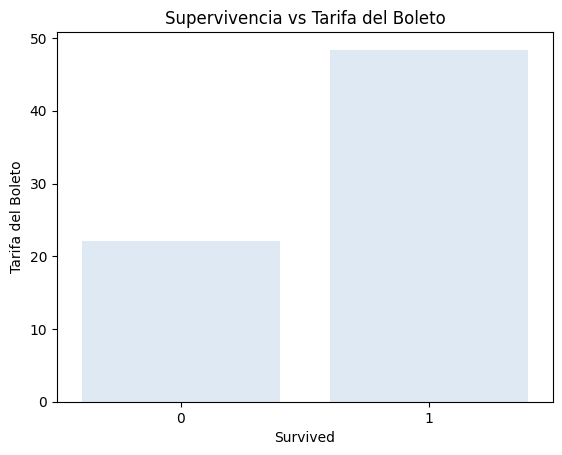

In [46]:
sns.barplot(x='Survived', y='Fare', data=data, ci=None)
plt.title('Supervivencia vs Tarifa del Boleto')
plt.xlabel('Survived')
plt.ylabel('Tarifa del Boleto')
plt.show()

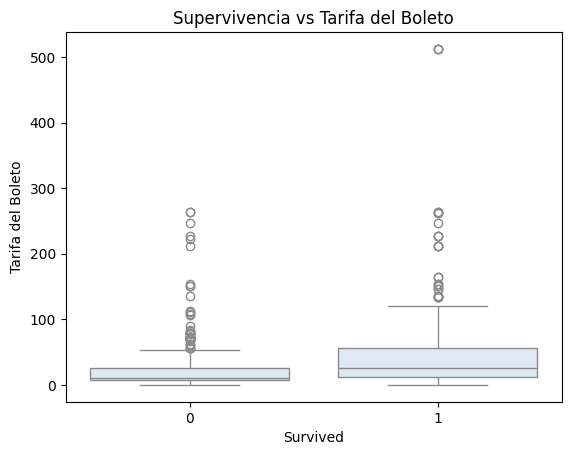

In [47]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Supervivencia vs Tarifa del Boleto')
plt.xlabel('Survived')
plt.ylabel('Tarifa del Boleto')
plt.show()

**En general, los pasajeros con tarifas de boletos más altas tenían más probabilidades de sobrevivir.**

### Supervivencia vs Embarked(Puerto de embarque del pasejo)

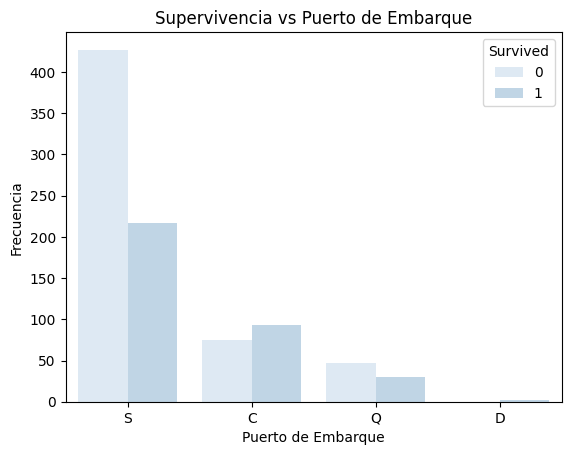

In [48]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Supervivencia vs Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Frecuencia')
plt.show()

In [49]:
pd.crosstab(data['Embarked'], data['Survived'], margins=True, margins_name='Total')

Survived,0,1,Total
Embarked,,,
C,75,93,168
D,0,2,2
Q,47,30,77
S,427,217,644
Total,549,342,891


**En la grafica se puede observar que la mayoria de supervivientes se ven en la embarcacion S, pero considerando los porcentajes de acuerdo al total de personas, la mayoria de sobrevivientes se dieron en la embarcacion Cherbourg**

# Guardado de Datos

Despues del analisis conservaremos este DataFrame como datos limpios para la etapa posterior que consistira en un modelo de predeccion para la supervivencia de los pasajeros 

In [50]:
# Guardar DataFrame limpio en un archivo CSV
data.to_csv('../data/train_clean.csv',index=False)

# Conclusiones a partir del Analisis Explatorio de Datos(EDA)

## 1. Distribución de Supervivencia

- Se observó que la proporción de supervivientes fue del 38.38% y no supervivientes del 61.62% en el conjunto de datos es . Esto sugiere que hubo mayor numero de defunciones asi que sera mas facil poder determinar el porque sobrevivieron las personas.

## 2.Características Demográficas

- Se analizaron variables demográficas como género (Sex), edad (Age), clase de boleto (Pclass), etc.
- Se observó que el el genero estuvo dominado por el sexo masculino correspondiente al 64.76% mientras que para el sexo femenino fue del 35.24%
el rango de edad de los pasajeros fue de 20-30 años,y clase predominante fue la tercera clase.
- Si bien la mayoria pasajeros fue del sexo masculino la supervivencia fue dominante del sexo femenino, se sabe que se priorizo a este sexo para la supervivencia en los barcos salvavidas, la poblacion mas joven tambien tuvo mayor exito de supervivencia, mientras que tambien la clase es esencial ya que las personas de primera clase tuvieron mayor indice de supervivencia.

## 3.Relaciones y Correlaciones

- Ademas de las caracteristicas demograficas se exploraron relaciones entre variables, como la correlación entre la clase de boleto y la tarifa pagada.

- La tercera clase fue la predominante, asi que el costo del boleto tambien fue menor para la mayoria de personas aproximadamente de $30 dolares el promedio por boleto.

- Se encontro que la clase y el costo del boleto aumentaban las probabilidades de ser superviviente, sin embargo esto se ve afectado por las demas variables como la edad y sexo por mencionar algunos

## 4.Valores Nulos y Limpieza de Datos

- Se identificaron y manejaron valores nulos en ciertas columnas, utilizando metodos de imputacion, sobre todo para no eliminar los datos y conservar la mayor cantidad de registros en la edad se utilizo la mediana,para la cabina y el ticket al ser datos irrelevantes o no necesarios para el analisis se prefirio la eliminacion de la columnas, y por ultima para la embarcacion al ser datos Desconocidos y ser pocos se relleno con un identificador los datos nulos.
- Al no tener datos nulos el analisis fue mas efectivo y tambien se evito el poder sesgar a estas personas

## 5.Visualizaciones

- Se crearon visualizaciones adicionales, como graficas de barra y cajas de bigotes para explorar generalmente a las columnas y como influyo en la supervivencia de las personas.


## 6.Conclusion General

- Se concluyó que todos los aspectos fueron clave en cuanto a la supervivencia de este tragico accidente.
- Estos hallazgos proporcionan información valiosa para la fase de modelado y predicción.